we will use the metro interstate traffic volume dataset available on the UCI machine learning repository. The original dataset recorded
the hourly westbound traffic on I-94 between Minneapolis and St. Paul in Minnesota, from 2012 to 2018. For the purpose of learning how to apply deep learning for time series forecasting, the dataset has been shortened and cleaned to get rid of missing values. Our main
forecasting goal is to predict the hourly traffic volume.

In the case of multi-output models, we will also forecast the hourly temperature.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
url = 'https://raw.githubusercontent.com/xbadiam/Forecasting/refs/heads/main/data/metro_interstate_traffic_volume_preprocessed.csv'
df = pd.read_csv(url)
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


As mentioned, this dataset is a shortened and cleaned version of the original dataset available on the UCI machine learning repository. In this case, the dataset starts onSeptember 29, 2016, at 5 p.m. and ends on September 30, 2018, at 11 p.m.

In [12]:
df.shape

(17551, 6)

The features include the date and time, the temperature, the amount of rain and snow, the cloud coverage, as well as the traffic volume.

Now, let’s visualize the evolution of the traffic volume over time. Since our dataset is very large, with more than 17,000 records, we’ll plot only the first 400 data points, which is roughly equivalent to two weeks of data.

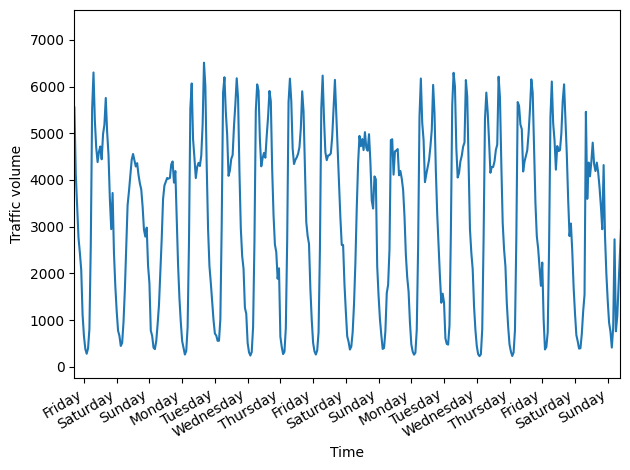

In [20]:
fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday',
                                   'Monday', 'Tuesday', 'Wednesday', 
                                   'Thursday', 'Friday', 'Saturday',
                                   'Sunday', 'Monday', 'Tuesday', 
                                   'Wednesday', 'Thursday', 'Friday',
                                   'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

notice clear daily seasonality, since the traffic volume is lower at the start and end of each day. You’ll also see a smaller traffic volume during the weekends. As for the trend, two weeks of data is likely insufficient to draw a reasonable conclusion,